# 1. Introduction to PyTorch deeplearning framework.
## Installation

To start using PyTorch, install it by running the following command in your terminal or command prompt (in Google Colab PyTorch is already installed):

`pip install torch`

In [ ]:
import torch

In [ ]:
!nvidia-smi

## Creating Tensors

In [ ]:
# Create a tensor from a list/array
tensor_a = torch.tensor([1, 2, 3, 4])

# Create a 2x3 matrix (2D tensor) with random values
tensor_b = torch.randn((3, 3, 3, 3))

In [ ]:
# Create a 2x3 matrix (2D tensor) with zeros
tensor_c = torch.zeros((2, 3))
print(tensor_c)

In [ ]:
# Create a zero matrix (2D tensor) with the shape of tensor_b
tensor_d = torch.zeros_like(tensor_c)
print(tensor_d)

In [ ]:
# check if it is the same
tensor_c == tensor_d

In [ ]:
# arbitraty dimensional tensor filled with the scalar value 1 (torch.ones_like also works)
torch.ones(2,3)

In [ ]:
# diagonal 2D tensor
# torch.eye(3)
# torch.eye(3,3)
# torch.eye(3,2)

In [ ]:
# display tensor shape
tensor_c.shape

In [ ]:
# transpose and display shape
tensor_c.T

In [ ]:
#create random tensor of arbitrary shape
tensor_r = torch.rand(3,3,3)
print(tensor_r)

## Operations with tensors

### Algebraic operations

In [ ]:
# basic tensor operations
tensor_c + 5
# tensor_c - 5
# tensor_c * 5
# tensor_c / 5

In [ ]:
# element-wise multiplication
tensor_a = torch.randn(3,2)
tensor_c = torch.mul(tensor_a, tensor_a)

In [ ]:
# matrix multiplication
tensor_a = torch.randn(3,2)
tensor_d = torch.randn(2,3)
tensor_c = torch.mm(tensor_a, tensor_d)

`mm()` stands for [Matrix Multiplications](https://pytorch.org/docs/stable/generated/torch.mm.html#torch.mm)

In [ ]:
tensor_a @ tensor_d == torch.mm(tensor_a, tensor_d)

### Reshaping

In [ ]:
tensor = torch.randn(3,3,3)

In [ ]:
tensor.shape

In [ ]:
tensor_one = tensor.view((-1, 1, 1))

In [ ]:
tensor_one.shape

In [ ]:
# tensor_one

In [ ]:
tensor_transposed = tensor.transpose(0, 2)

In [ ]:
tensor_two = tensor_transposed.view((-1, 1, 1))

A contiguous tensor is a tensor whose elements are stored in a contiguous block of memory, with no extra padding or space between the elements. A tensor is said to be contiguous if it follows the “row-major” order, meaning that the elements are stored in memory in a consecutive order, row by row.

The contiguous() function is essential in PyTorch because it ensures that the tensor data is stored in a contiguous block of memory. This memory layout is required for efficient tensor operations as it allows the CPU or GPU to access the tensor elements in a consecutive order.

When we perform tensor operations, the PyTorch engine expects the tensor data to be stored in a contiguous block of memory. If the tensor is non-contiguous, PyTorch must first convert it to a contiguous tensor before performing any operation. This conversion can be time-consuming and can significantly slow down the computation.

In [ ]:
# tensor_transposed = tensor_transposed.contiguous()
# tensor_two = tensor_transposed.view((-1, 1, 1))

# alternatively
tensor_two = tensor_transposed.reshape((-1, 1, 1))

In [ ]:
# add/remove dimesions

# (1,3,3,1,3,1)

tensor = torch.randn(3,3,3)
tensor = tensor.unsqueeze(0).unsqueeze(3).unsqueeze(-1)
print(tensor.shape)

In [ ]:
tensor = tensor.squeeze(0).squeeze(2)
print(tensor.shape)

### Casting

In [ ]:
# cast tensor to float dtype
tensor = torch.randn(3,3,3)
tensor = tensor.float()

### Normalization

In [ ]:
# clamp the tensor elements within the specified range
tensor_clamp = torch.clamp(tensor, min=-1, max=3)

In [ ]:
# normalize the tensor along the specified dimension
tensor_norm = torch.nn.functional.normalize(tensor, p=2, dim=1)

In [ ]:
# tensor_clamp.max()
tensor_norm.min()

### Gradient computation

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2
y.backward()  # Computes the gradient dy/dx at x = 2

### Computation on GPU

In [ ]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

In [ ]:
print(device)

In [ ]:
!nvidia-smi

To enable GPU in Google Colab go to: Edit -> Notebook settings, then chose: T4 GPU


In [ ]:
# send tensor to GPU:
x = torch.randn(3,3)
# x = x.to(device)

# alternatively:
x.cuda()
# x.to('cuda')

# send back to CPU
# x.cpu()
# x.to('cpu')

## Neural Networks with PyTorch

### last year practice with more low level details: https://drive.google.com/file/d/15Y3rbwRpaXc2gTqX3KhxLBe_2ahQ-wQb/view?usp=sharing

In [1]:
import torch
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', rc={'figure.figsize':(10,7)})

In [14]:
def sigmoid(z): 
    #takes in an input and outputs a value between 1 & 0
    #used to introduce non linearity to the model, more complex relationship
    return 1. / (1. + torch.exp(-z))

In [15]:
# Generate the dataset
#n_samples=100 specifies the number of samples in the dataset
#shuffle=False indicates that the samples should not be shuffled.
#factor=0.3 controls the relative size of the inner and outer circles
#noise=0.05 adds random noise to the samples
X, t = sklearn.datasets.make_circles(
    n_samples=100, shuffle=False, factor=0.3, noise=0.05)
T = np.zeros((100, 2)) # Define target matrix
T[t==1, 1] = 1 #assigns the value 1 to the second column of the target matrix
T[t==0, 0] = 1
# Separate the red and blue samples for plotting
x_red = X[t==0] 
x_blue = X[t==1]

print('shape of X: {}'.format(X.shape))
print('shape of T: {}'.format(T.shape))

shape of X: (100, 2)
shape of T: (100, 2)


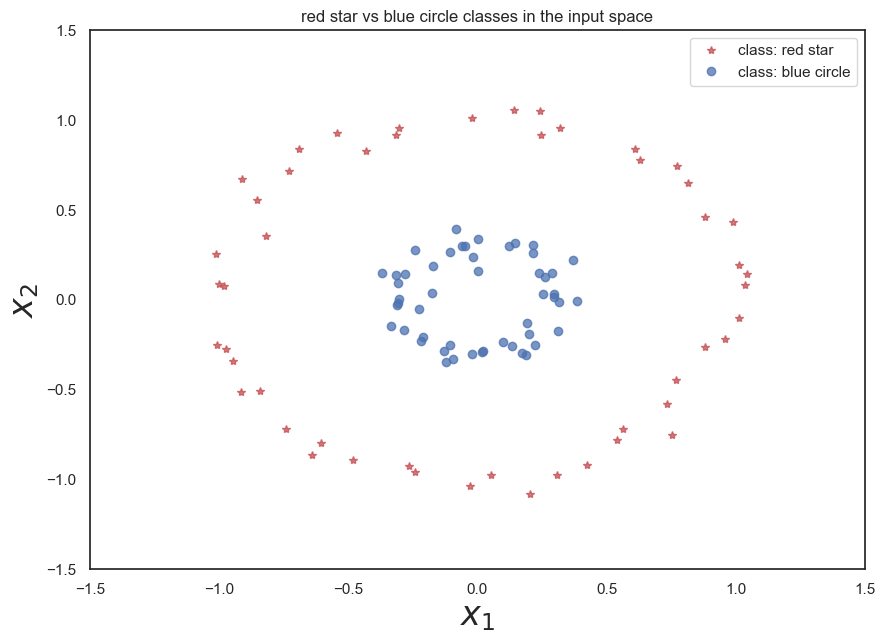

In [16]:
# Plot both classes on the x1, x2 plane
plt.plot(x_red[:,0], x_red[:,1], 'r*',
         label='class: red star', alpha=0.75)
plt.plot(x_blue[:,0], x_blue[:,1], 'bo',
         label='class: blue circle', alpha=0.75)
plt.legend(loc=1)
plt.xlabel('$x_1$', fontsize=24)
plt.ylabel('$x_2$', fontsize=24)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red star vs blue circle classes in the input space')
plt.show()

In [17]:
class Model(torch.nn.Module): # Defines a class named Model that inherits from torch.nn.Module, making it a PyTorch neural network module.
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        # input_size: Number of input features.

        # H1: Number of neurons in the hidden layer.

        # output_size: Number of output neurons (1 for binary classification).

        # self.linear1: First linear layer, mapping input to the hidden layer.

        # self.linear2: Second linear layer, mapping hidden layer to the output.
        self.linear1 = torch.nn.Linear(in_features = input_size, out_features = H1)
        self.linear2 = torch.nn.Linear(H1, output_size)
    def forward(self, x): #Defines the forward pass of the neural network.
        x1 = torch.nn.functional.tanh(self.linear1(x)) #Applies hyperbolic tangent activation function to the output of the first linear layer.
        x2 = self.linear2(x1) #Passes the result through the second linear layer
        return sigmoid(x2) #Applies the sigmoid activation function to the output of the second linear layer and returns the result.
    def predict(self, x):
        pred = self.forward(x) #Calls the forward method to obtain the prediction
        if pred >= 0.5:
            return 1
        else:
            return 0

In [18]:
model = Model(2, 3, 1)

In [19]:
model.linear1

Linear(in_features=2, out_features=3, bias=True)

In [20]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2120, -0.6784],
        [ 0.5794,  0.1705],
        [ 0.5925, -0.3027]], requires_grad=True), Parameter containing:
tensor([ 0.7041,  0.4436, -0.1905], requires_grad=True), Parameter containing:
tensor([[0.1103, 0.0598, 0.1010]], requires_grad=True), Parameter containing:
tensor([0.5529], requires_grad=True)]


In [21]:
criterion = torch.nn.BCELoss()
#Binary Cross Entropy Loss measures the difference between the predicted probability distribution and the target distribution (which is expected to be binary, 0 or 1). 
#It is suitable when the final layer of the neural network has a sigmoid activation function.
# criterion = torch.nn.BCEWithLogitsLoss()
#This variant is useful when the final layer of the neural network does not have an activation function applied (i.e., raw logits are used). 
# The BCEWithLogitsLoss combines the sigmoid activation and binary cross-entropy loss into a single operation, which can be more numerically stable.
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)
#Instantiates an object of the Adam optimizer and associates it with the parameters of the neural network model.
# model.parameters() provides the parameters (weights and biases) of the neural network to the optimizer.
# lr=0.1 sets the learning rate for the optimizer. The learning rate controls the step size during optimization.

In [22]:
x_data = torch.Tensor(X)
#Converts the NumPy array X (assuming it contains the input features) to a PyTorch tensor. 
# This creates a new tensor x_data with the same data as X.
y_data = torch.Tensor(t).unsqueeze(1)
#Converts the NumPy array t (assuming it contains target labels) to a PyTorch tensor. This creates a new tensor y_data with the same data as t.
#.unsqueeze(1): Adds a new dimension to the tensor along dimension 1. 
#This is often necessary when dealing with target labels in PyTorch, especially for compatibility with loss functions that expect a certain shape.

In [23]:
epochs = 1000 #the number of times the entire dataset is passed through the neural network for training
losses = []

for i in range(epochs):
    optimizer.zero_grad()
    #Clears the gradients of all optimized parameters. 
    # This is necessary before computing the gradients for the next batch to prevent accumulation of gradients from previous batches
    y_pred = model.forward(x_data)
    #Performs a forward pass through the neural network to obtain predictions (y_pred) for the input data (x_data)
    loss = criterion(y_pred, y_data.float())
    #Computes the loss between the predicted values (y_pred) and the target values (y_data).
    #The target values are converted to float using .float() to match the data type expected by the loss function.
    #print("epoch:", i, "loss", loss.item())
    losses.append(loss.item()) #The .item() method extracts the scalar value from the loss tensor
    #Appends the current training loss to the losses list
    loss.backward()
    #Computes the gradients of the model parameters with respect to the loss. This step is essential for backpropagation.
    optimizer.step()
    #Updates the model parameters using the gradients computed during the backward pass. 
    #This is the optimization step, where the optimizer adjusts the model weights to minimize the loss.

Text(0.5, 0, 'epoch')

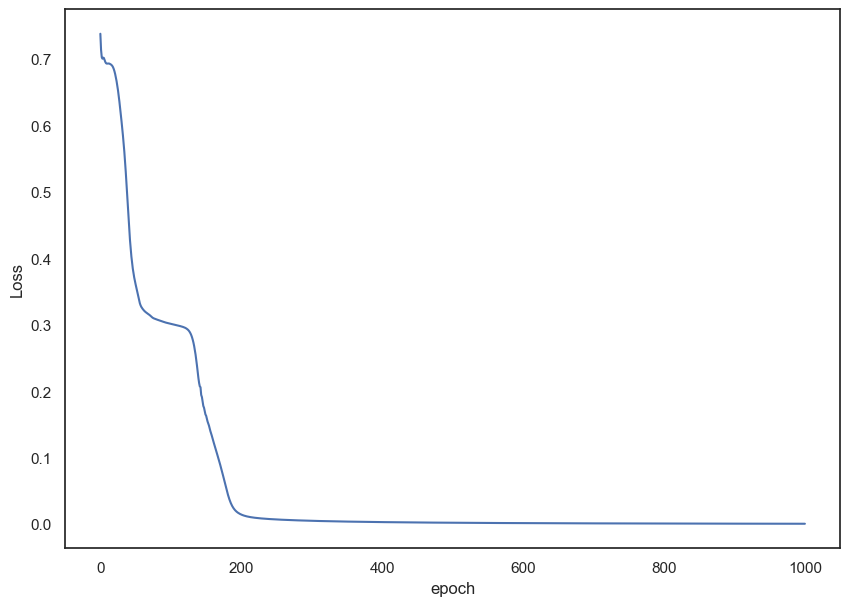

In [24]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [25]:
def plot_decision_boundary(X, y):
    x_span = np.linspace(min(X[:, 0]) -0.5, max(X[:, 0]) + 0.5)
    y_span = np.linspace(min(X[:, 1]) -0.5, max(X[:, 1]) + 0.5)
    #Generate evenly spaced values within the range of the input features (X)
    xx, yy = np.meshgrid(x_span, y_span)
    #Creates a 2D grid (xx and yy) from the 1D arrays x_span and y_span. 
    #This grid spans the entire feature space
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    #Combines the flattened versions of xx and yy into a single array and converts it into a PyTorch tensor. 
    #This creates a grid of input points for which the model will make predictions.
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).cpu().detach().numpy()
    #Reshapes the predictions to match the shape of the original grid (xx). The .cpu().detach().numpy() sequence is used to move the tensor to the CPU and convert it to a NumPy array. 
    # This is necessary if the model is running on a GPU.
    plt.contourf(xx, yy, z)
    #Creates a filled contour plot using the original feature space (xx and yy) and the reshaped predictions (z). The filled contours represent different decision regions of the model

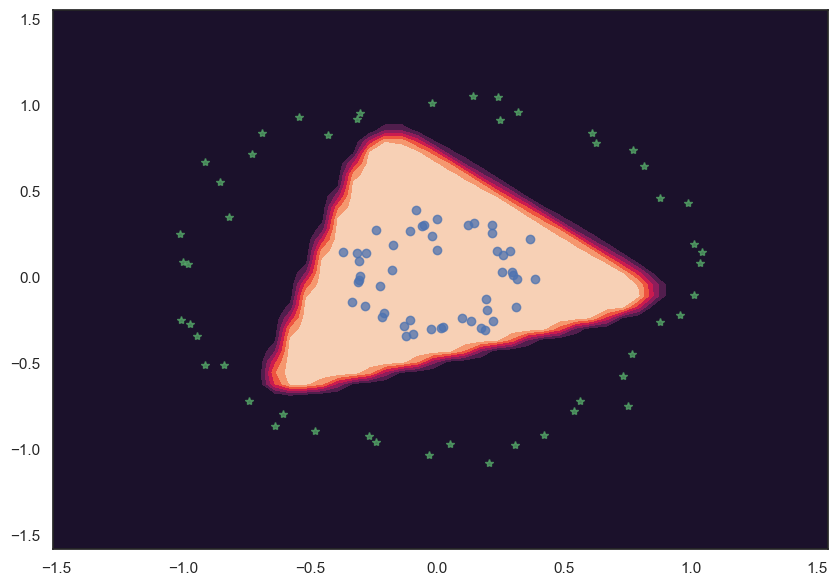

In [26]:
# Plot the resulting decision boundary
plot_decision_boundary(X, t)
plt.plot(x_red[:,0], x_red[:,1], 'g*',
         label='class: red star', alpha=0.75)
plt.plot(x_blue[:,0], x_blue[:,1], 'bo',
         label='class: blue circle', alpha=0.75)

# ⚠️⚠️⚠️ Homework ⚠️⚠️⚠️

* Rewrite the neural network above without using torch.nn.Linear (you can use torch.tensor to define weights and biases)
* Try to add more layers. How does it affect trainining loss evolution?

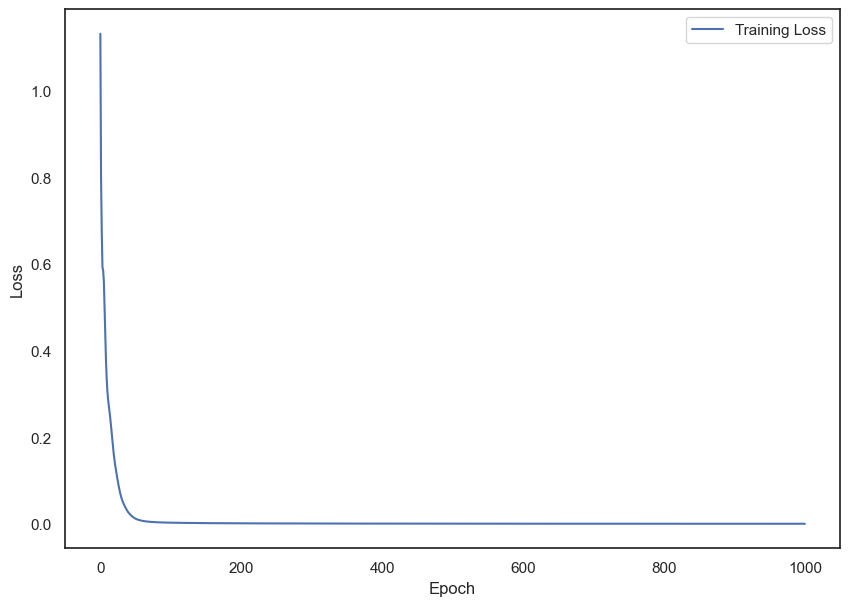

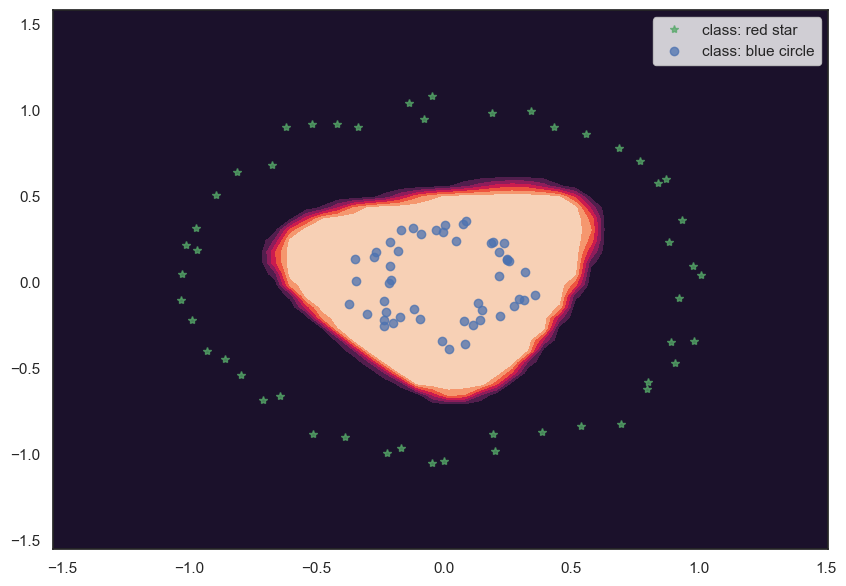

In [28]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Generate the dataset
X, t = sklearn.datasets.make_circles(
    n_samples=100, shuffle=False, factor=0.3, noise=0.05)
T = np.zeros((100, 2))  # Define target matrix
T[t == 1, 1] = 1
T[t == 0, 0] = 1

# Separate the red and blue samples for plotting
x_red = X[t == 0]
x_blue = X[t == 1]

# Convert data to PyTorch tensors
x_data = torch.Tensor(X)
y_data = torch.Tensor(t).unsqueeze(1)

# Define the neural network without using torch.nn.Linear
class CustomModel(torch.nn.Module):
    def __init__(self, input_size, H1, H2, output_size):
        super().__init__()

       # Define weights and biases for the first layer
        self.W1 = torch.nn.Parameter(torch.randn(input_size, H1))
        self.b1 = torch.nn.Parameter(torch.zeros(1, H1))

        # Define weights and biases for the second layer
        self.W2 = torch.nn.Parameter(torch.randn(H1, H2))
        self.b2 = torch.nn.Parameter(torch.zeros(1, H2))

        # Define weights and biases for the output layer
        self.W3 = torch.nn.Parameter(torch.randn(H2, output_size))
        self.b3 = torch.nn.Parameter(torch.zeros(1, output_size))

    def forward(self, x):
        # First layer: linear transformation and tanh activation
        x1 = torch.tanh(x @ self.W1 + self.b1)

        # Second layer: linear transformation and tanh activation
        x2 = torch.tanh(x1 @ self.W2 + self.b2)

        # Output layer: linear transformation and sigmoid activation
        x3 = torch.sigmoid(x2 @ self.W3 + self.b3)

        return x3

    def predict(self, x):
        pred = self.forward(x)
        return (pred >= 0.5).float()

# Instantiate the custom model
model = CustomModel(input_size=2, H1=5, H2=5, output_size=1)

# Define the BCE loss and Adam optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data.float())
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

# Plot the training loss over epochs
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the resulting decision boundary
plot_decision_boundary(X, t)
plt.plot(x_red[:, 0], x_red[:, 1], 'g*', label='class: red star', alpha=0.75)
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='class: blue circle', alpha=0.75)
plt.legend()
plt.show()


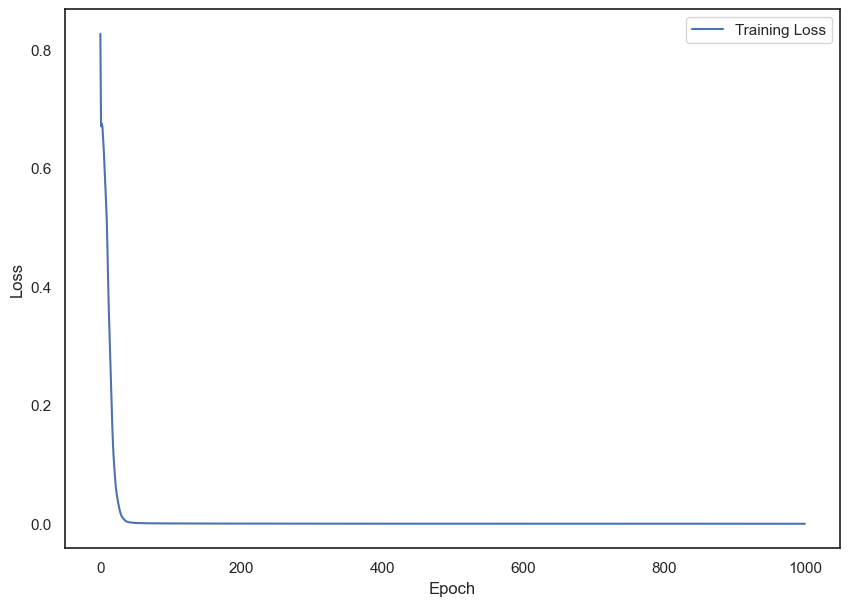

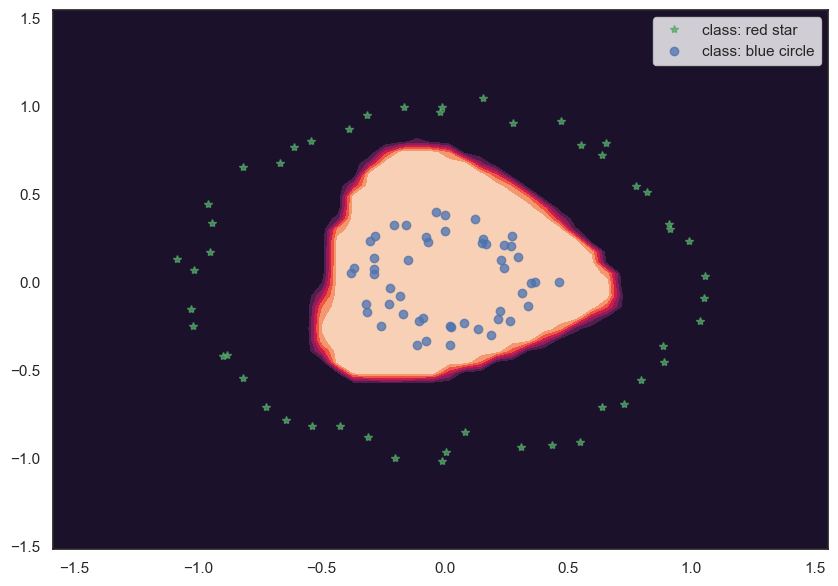

In [37]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Generate the dataset
X, t = sklearn.datasets.make_circles(
    n_samples=100, shuffle=False, factor=0.3, noise=0.05)
T = np.zeros((100, 2))  # Define target matrix
T[t == 1, 1] = 1
T[t == 0, 0] = 1

# Separate the red and blue samples for plotting
x_red = X[t == 0]
x_blue = X[t == 1]

# Convert data to PyTorch tensors
x_data = torch.Tensor(X)
y_data = torch.Tensor(t).unsqueeze(1)

# Define the neural network without using torch.nn.Linear
class CustomModel(torch.nn.Module):
    def __init__(self, input_size, H1, H2, H3, output_size):
        super().__init__()

       # Define weights and biases for the first layer
        self.W1 = torch.nn.Parameter(torch.randn(input_size, H1))
        self.b1 = torch.nn.Parameter(torch.zeros(1, H1))

        # Define weights and biases for the second layer
        self.W2 = torch.nn.Parameter(torch.randn(H1, H2))
        self.b2 = torch.nn.Parameter(torch.zeros(1, H2))

        self.W3 = torch.nn.Parameter(torch.randn(H2, H3))
        self.b3 = torch.nn.Parameter(torch.zeros(1, H3))

        # Define weights and biases for the output layer
        self.W4 = torch.nn.Parameter(torch.randn(H3, output_size))
        self.b4 = torch.nn.Parameter(torch.zeros(1, output_size))
    def forward(self, x):
        # First layer: linear transformation and tanh activation
        x1 = torch.tanh(x @ self.W1 + self.b1)

        # Second layer: linear transformation and tanh activation
        x2 = torch.tanh(x1 @ self.W2 + self.b2)

        x3 = torch.tanh(x2 @ self.W3 + self.b3)

        # Output layer: linear transformation and sigmoid activation
        x4 = torch.sigmoid(x3 @ self.W4 + self.b4)
        

        return x4

    def predict(self, x):
        pred = self.forward(x)
        return (pred >= 0.5).float()

# Instantiate the custom model
model = CustomModel(input_size=2, H1=5, H2=5, H3=5, output_size=1)

# Define the BCE loss and Adam optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data.float())
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

# Plot the training loss over epochs
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the resulting decision boundary
plot_decision_boundary(X, t)
plt.plot(x_red[:, 0], x_red[:, 1], 'g*', label='class: red star', alpha=0.75)
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='class: blue circle', alpha=0.75)
plt.legend()
plt.show()


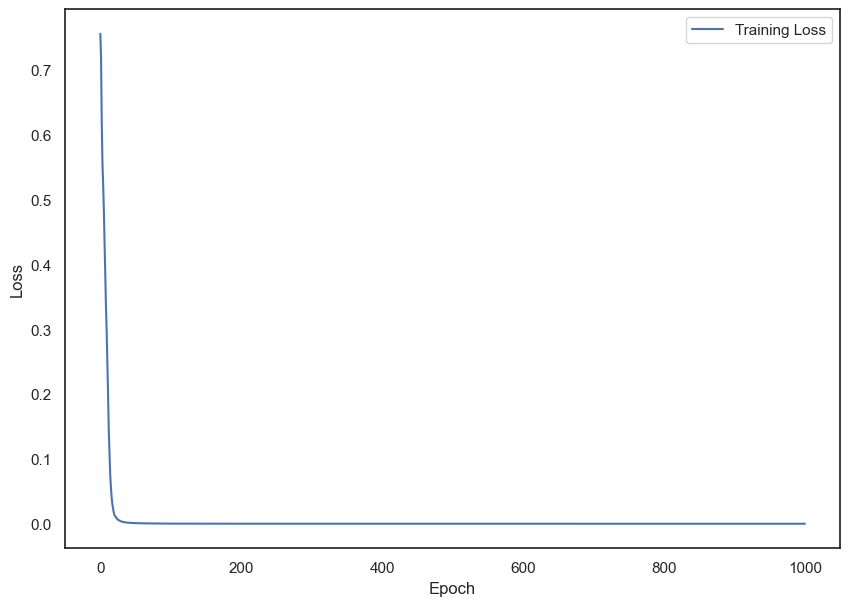

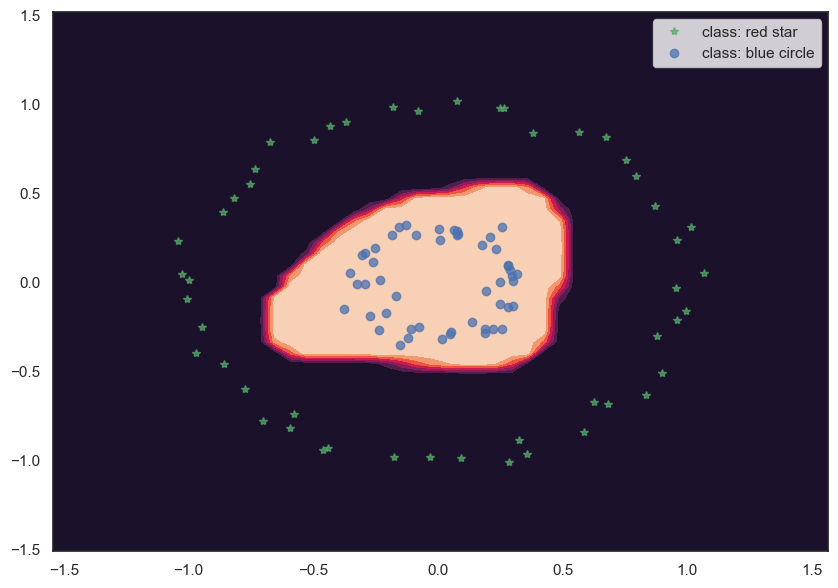

In [40]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Generate the dataset
X, t = sklearn.datasets.make_circles(
    n_samples=100, shuffle=False, factor=0.3, noise=0.05)
T = np.zeros((100, 2))  # Define target matrix
T[t == 1, 1] = 1
T[t == 0, 0] = 1

# Separate the red and blue samples for plotting
x_red = X[t == 0]
x_blue = X[t == 1]

# Convert data to PyTorch tensors
x_data = torch.Tensor(X)
y_data = torch.Tensor(t).unsqueeze(1)

# Define the neural network without using torch.nn.Linear
class CustomModel(torch.nn.Module):
    def __init__(self, input_size, H1, H2, H3, H4, output_size):
        super().__init__()

       # Define weights and biases for the first layer
        self.W1 = torch.nn.Parameter(torch.randn(input_size, H1))
        self.b1 = torch.nn.Parameter(torch.zeros(1, H1))

        # Define weights and biases for the second layer
        self.W2 = torch.nn.Parameter(torch.randn(H1, H2))
        self.b2 = torch.nn.Parameter(torch.zeros(1, H2))

        self.W3 = torch.nn.Parameter(torch.randn(H2, H3))
        self.b3 = torch.nn.Parameter(torch.zeros(1, H3))

        self.W4 = torch.nn.Parameter(torch.randn(H3, H4))
        self.b4 = torch.nn.Parameter(torch.zeros(1, H4))

        # Define weights and biases for the output layer
        self.W5 = torch.nn.Parameter(torch.randn(H4, output_size))
        self.b5 = torch.nn.Parameter(torch.zeros(1, output_size))
    def forward(self, x):
        # First layer: linear transformation and tanh activation
        x1 = torch.tanh(x @ self.W1 + self.b1)

        # Second layer: linear transformation and tanh activation
        x2 = torch.tanh(x1 @ self.W2 + self.b2)

        x3 = torch.tanh(x2 @ self.W3 + self.b3)

        x4 = torch.tanh(x3 @ self.W4 + self.b4)

        # Output layer: linear transformation and sigmoid activation
        x5 = torch.sigmoid(x4 @ self.W5 + self.b5)
        
        return x5

    def predict(self, x):
        pred = self.forward(x)
        return (pred >= 0.5).float()

# Instantiate the custom model
model = CustomModel(input_size=2, H1=5, H2=5, H3=5, H4=5, output_size=1)

# Define the BCE loss and Adam optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data.float())
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

# Plot the training loss over epochs
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the resulting decision boundary
plot_decision_boundary(X, t)
plt.plot(x_red[:, 0], x_red[:, 1], 'g*', label='class: red star', alpha=0.75)
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='class: blue circle', alpha=0.75)
plt.legend()
plt.show()


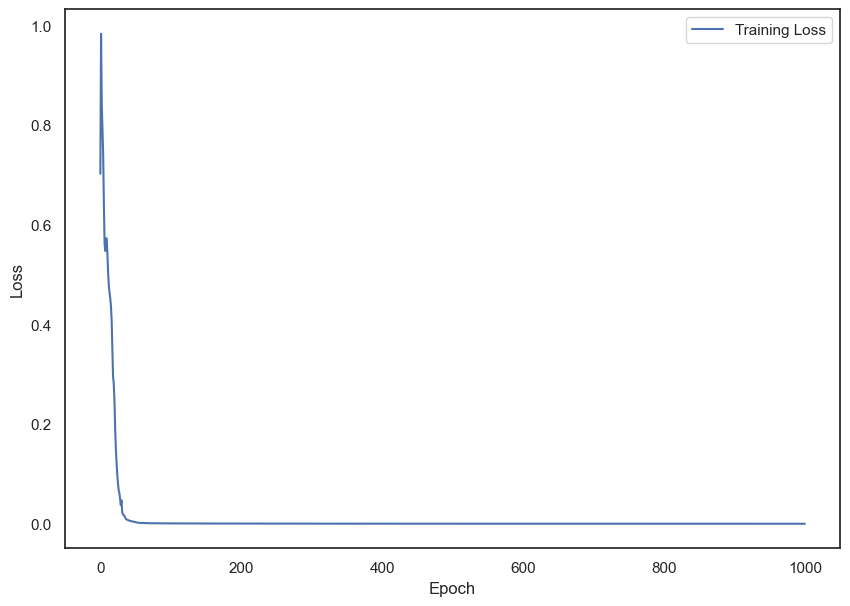

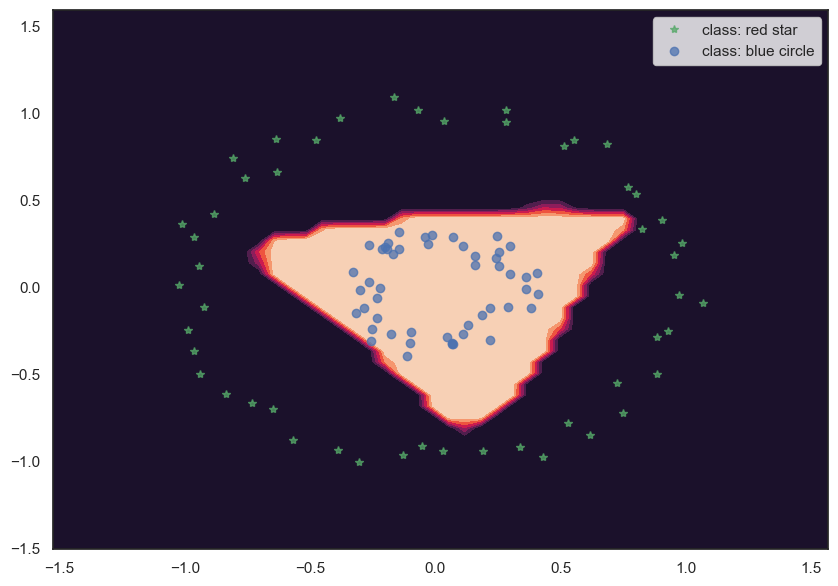

In [42]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Generate the dataset
X, t = sklearn.datasets.make_circles(
    n_samples=100, shuffle=False, factor=0.3, noise=0.05)
T = np.zeros((100, 2))  # Define target matrix
T[t == 1, 1] = 1
T[t == 0, 0] = 1

# Separate the red and blue samples for plotting
x_red = X[t == 0]
x_blue = X[t == 1]

# Convert data to PyTorch tensors
x_data = torch.Tensor(X)
y_data = torch.Tensor(t).unsqueeze(1)

# Define the neural network without using torch.nn.Linear
class CustomModel(torch.nn.Module):
    def __init__(self, input_size, H1, H2, H3, H4, H5, output_size):
        super().__init__()

       # Define weights and biases for the first layer
        self.W1 = torch.nn.Parameter(torch.randn(input_size, H1))
        self.b1 = torch.nn.Parameter(torch.zeros(1, H1))

        # Define weights and biases for the second layer
        self.W2 = torch.nn.Parameter(torch.randn(H1, H2))
        self.b2 = torch.nn.Parameter(torch.zeros(1, H2))

        self.W3 = torch.nn.Parameter(torch.randn(H2, H3))
        self.b3 = torch.nn.Parameter(torch.zeros(1, H3))

        self.W4 = torch.nn.Parameter(torch.randn(H3, H4))
        self.b4 = torch.nn.Parameter(torch.zeros(1, H4))

        self.W5 = torch.nn.Parameter(torch.randn(H4, H5))
        self.b5 = torch.nn.Parameter(torch.zeros(1, H5))

        # Define weights and biases for the output layer
        self.W6 = torch.nn.Parameter(torch.randn(H5, output_size))
        self.b6 = torch.nn.Parameter(torch.zeros(1, output_size))

    def forward(self, x):
        # First layer: linear transformation and tanh activation
        x1 = torch.tanh(x @ self.W1 + self.b1)

        # Second layer: linear transformation and tanh activation
        x2 = torch.tanh(x1 @ self.W2 + self.b2)

        x3 = torch.tanh(x2 @ self.W3 + self.b3)

        x4 = torch.tanh(x3 @ self.W4 + self.b4)

        x5 = torch.tanh(x4 @ self.W5 + self.b5)

        # Output layer: linear transformation and sigmoid activation
        x6 = torch.sigmoid(x5 @ self.W6 + self.b6)
        
        return x6

    def predict(self, x):
        pred = self.forward(x)
        return (pred >= 0.5).float()

# Instantiate the custom model
model = CustomModel(input_size=2, H1=5, H2=5, H3=5, H4=5, H5=5, output_size=1)

# Define the BCE loss and Adam optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data.float())
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

# Plot the training loss over epochs
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the resulting decision boundary
plot_decision_boundary(X, t)
plt.plot(x_red[:, 0], x_red[:, 1], 'g*', label='class: red star', alpha=0.75)
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='class: blue circle', alpha=0.75)
plt.legend()
plt.show()


y_pred size: torch.Size([100, 1])
y_data size: torch.Size([100, 1])
y_pred size: torch.Size([100, 1])
y_data size: torch.Size([100, 1])
y_pred size: torch.Size([100, 1])
y_data size: torch.Size([100, 1])
y_pred size: torch.Size([100, 1])
y_data size: torch.Size([100, 1])
y_pred size: torch.Size([100, 1])
y_data size: torch.Size([100, 1])
y_pred size: torch.Size([100, 1])
y_data size: torch.Size([100, 1])
y_pred size: torch.Size([100, 1])
y_data size: torch.Size([100, 1])
y_pred size: torch.Size([100, 1])
y_data size: torch.Size([100, 1])
y_pred size: torch.Size([100, 1])
y_data size: torch.Size([100, 1])
y_pred size: torch.Size([100, 1])
y_data size: torch.Size([100, 1])
y_pred size: torch.Size([100, 1])
y_data size: torch.Size([100, 1])
y_pred size: torch.Size([100, 1])
y_data size: torch.Size([100, 1])
y_pred size: torch.Size([100, 1])
y_data size: torch.Size([100, 1])
y_pred size: torch.Size([100, 1])
y_data size: torch.Size([100, 1])
y_pred size: torch.Size([100, 1])
y_data size: t

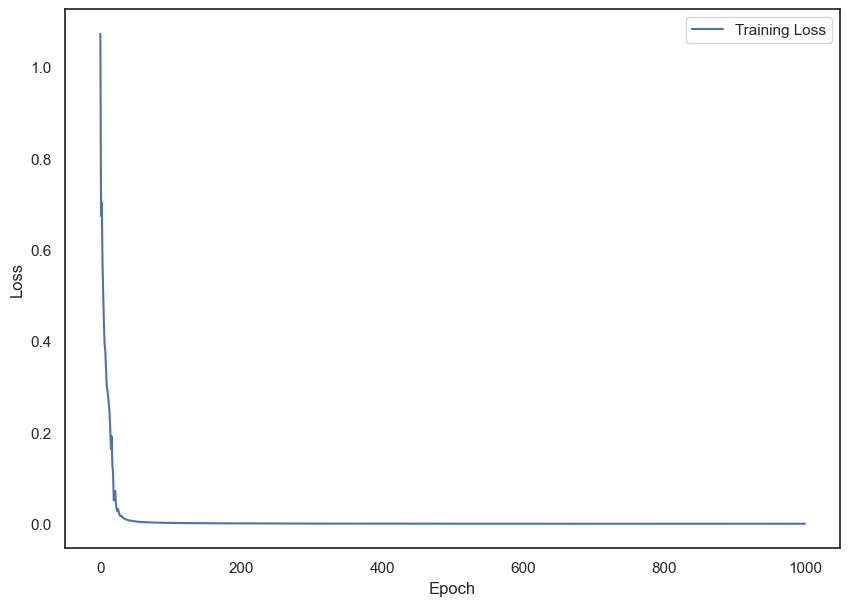

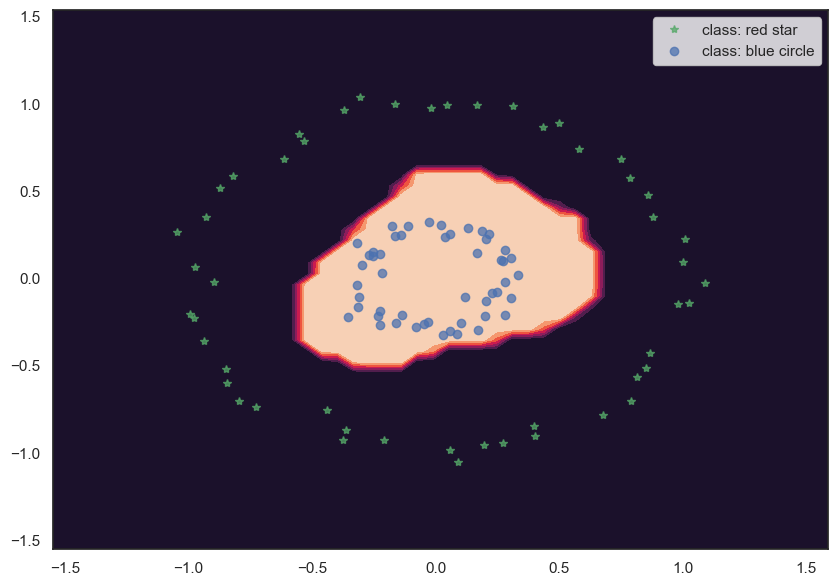

In [61]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Generate the dataset
X, t = sklearn.datasets.make_circles(
    n_samples=100, shuffle=False, factor=0.3, noise=0.05)
T = np.zeros((100, 2))  # Define target matrix
T[t == 1, 1] = 1
T[t == 0, 0] = 1

# Separate the red and blue samples for plotting
x_red = X[t == 0]
x_blue = X[t == 1]

# Convert data to PyTorch tensors
x_data = torch.Tensor(X)
y_data = torch.Tensor(t).unsqueeze(1)

# Define the neural network without using torch.nn.Linear
class CustomModel(torch.nn.Module):
    def __init__(self, input_size, H1, H2, H3, H4, H5, H6, output_size):
        super().__init__()

       # Define weights and biases for the first layer
        self.W1 = torch.nn.Parameter(torch.randn(input_size, H1))
        self.b1 = torch.nn.Parameter(torch.zeros(1, H1))

        # Define weights and biases for the second layer
        self.W2 = torch.nn.Parameter(torch.randn(H1, H2))
        self.b2 = torch.nn.Parameter(torch.zeros(1, H2))

        self.W3 = torch.nn.Parameter(torch.randn(H2, H3))
        self.b3 = torch.nn.Parameter(torch.zeros(1, H3))

        self.W4 = torch.nn.Parameter(torch.randn(H3, H4))
        self.b4 = torch.nn.Parameter(torch.zeros(1, H4))

        self.W5 = torch.nn.Parameter(torch.randn(H4, H5))
        self.b5 = torch.nn.Parameter(torch.zeros(1, H5))

        self.W6 = torch.nn.Parameter(torch.randn(H5, H6))
        self.b6 = torch.nn.Parameter(torch.zeros(1, H6))

        # Define weights and biases for the output layer
        self.W7 = torch.nn.Parameter(torch.randn(H6, output_size))
        self.b7 = torch.nn.Parameter(torch.zeros(1, output_size))

    def forward(self, x):
        # First layer: linear transformation and tanh activation
        x1 = torch.tanh(x @ self.W1 + self.b1)

        # Second layer: linear transformation and tanh activation
        x2 = torch.tanh(x1 @ self.W2 + self.b2)

        x3 = torch.tanh(x2 @ self.W3 + self.b3)

        x4 = torch.tanh(x3 @ self.W4 + self.b4)

        x5 = torch.tanh(x4 @ self.W5 + self.b5)

        x6 = torch.tanh(x5 @ self.W6 + self.b6)

        # Output layer: linear transformation and sigmoid activation
        x7 = torch.sigmoid(x6 @ self.W7 + self.b7)
        
        return x7

    def predict(self, x):
        pred = self.forward(x)
        return (pred >= 0.5).float()

# Instantiate the custom model
model = CustomModel(input_size=2, H1=5, H2=5, H3=5, H4=5, H5=5, H6=5, output_size=1)

# Define the BCE loss and Adam optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model.forward(x_data)
    print("y_pred size:", y_pred.size())
    print("y_data size:", y_data.size())
    loss = criterion(y_pred, y_data.float())
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

# Plot the training loss over epochs
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the resulting decision boundary
plot_decision_boundary(X, t)
plt.plot(x_red[:, 0], x_red[:, 1], 'g*', label='class: red star', alpha=0.75)
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='class: blue circle', alpha=0.75)
plt.legend()
plt.show()


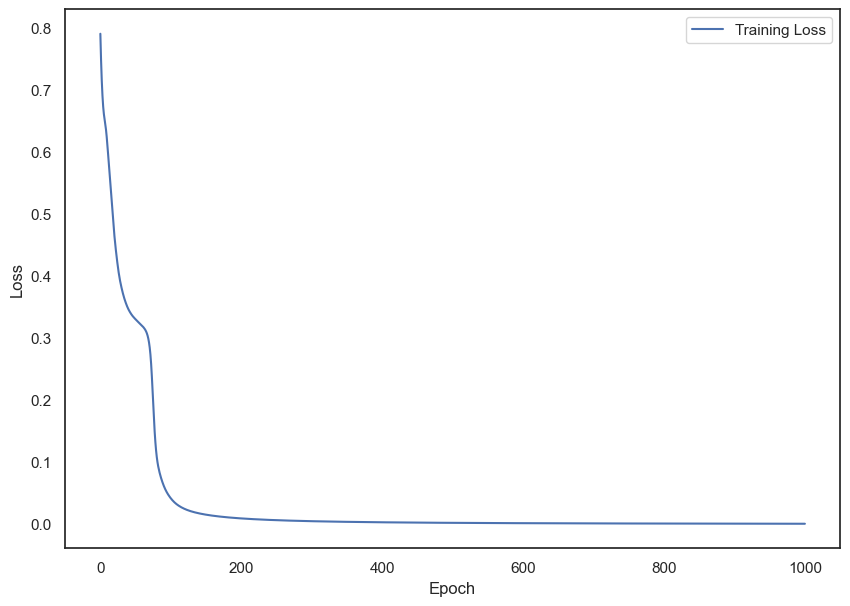

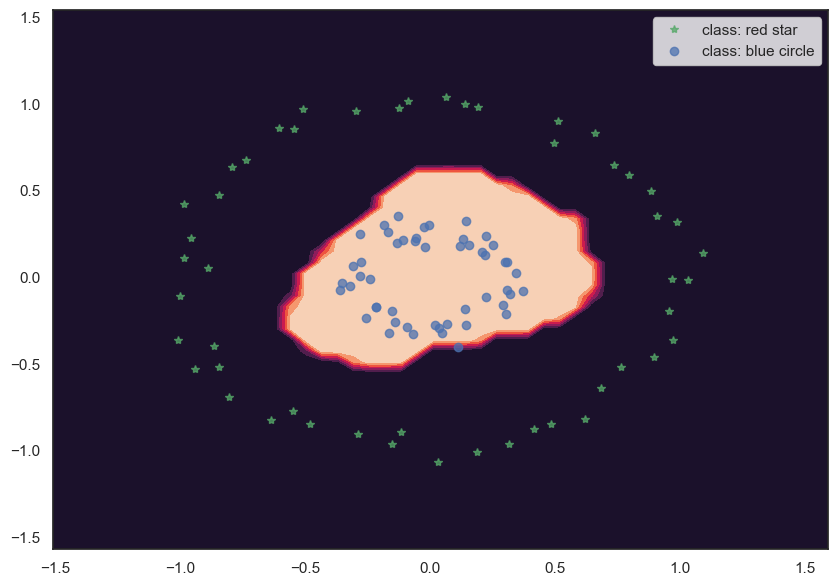

In [65]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

# Assuming X, t, x_red, x_blue are defined
X, t = sklearn.datasets.make_circles(n_samples=100, shuffle=False, factor=0.3, noise=0.05)
x_red = X[t == 0]
x_blue = X[t == 1]

# Generate the dataset
T = np.zeros((100, 2))  # Define target matrix
T[t == 1, 1] = 1
T[t == 0, 0] = 1

# Separate the red and blue samples for plotting
x_red = X[t == 0]
x_blue = X[t == 1]

# Convert data to PyTorch tensors
x_data = torch.Tensor(X)
y_data = torch.Tensor(t).unsqueeze(1)

class CustomModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size1, output_size):
        super(CustomModel, self).__init__()

        # Define learnable parameters without torch.nn.Parameter
        self.weights1 = torch.randn(input_size, hidden_size1, requires_grad=True)
        self.bias1 = torch.zeros(hidden_size1, requires_grad=True)

        self.weights2 = torch.randn(hidden_size1, output_size, requires_grad=True)
        self.bias2 = torch.zeros(output_size, requires_grad=True)

    def forward(self, x):
        x1 = F.tanh(torch.matmul(x, self.weights1) + self.bias1)
        x2 = torch.matmul(x1, self.weights2) + self.bias2
        return F.sigmoid(x2)

    def parameters(self):
        return [self.weights1, self.bias1, self.weights2, self.bias2]

    def predict(self, x):
        pred = self.forward(x)
        return torch.where(pred >= 0.5, torch.tensor(1), torch.tensor(0))

# Instantiate the model
custom_model = CustomModel(input_size=2, hidden_size1=3, output_size=1)

# Manually get the parameters from the model
parameters = custom_model.parameters()

# Define the BCE loss and Adam optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(parameters, lr=0.1)

# Training loop
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = custom_model.forward(x_data)
    # print("y_pred size:", y_pred.size())
    # print("y_data size:", y_data.size())
    loss = criterion(y_pred, y_data.float())
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

# Plot the training loss over epochs
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the resulting decision boundary
plot_decision_boundary(X, t)
plt.plot(x_red[:, 0], x_red[:, 1], 'g*', label='class: red star', alpha=0.75)
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='class: blue circle', alpha=0.75)
plt.legend()
plt.show()


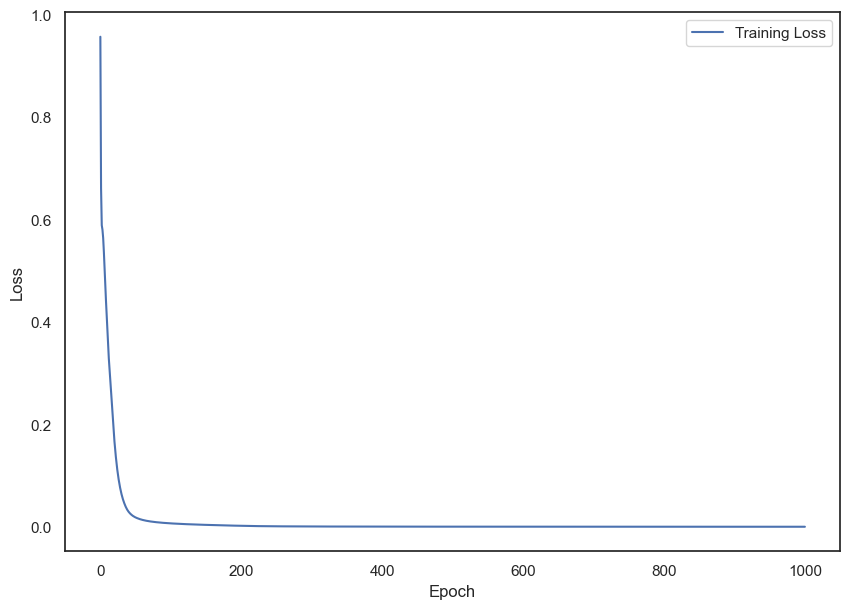

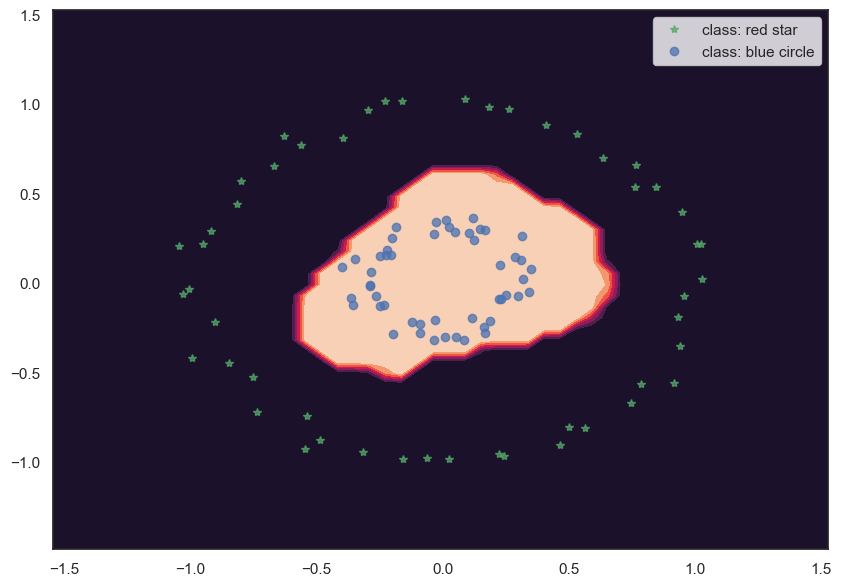

In [66]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

# Assuming X, t, x_red, x_blue are defined
X, t = sklearn.datasets.make_circles(n_samples=100, shuffle=False, factor=0.3, noise=0.05)
x_red = X[t == 0]
x_blue = X[t == 1]

# Generate the dataset
T = np.zeros((100, 2))  # Define target matrix
T[t == 1, 1] = 1
T[t == 0, 0] = 1

# Separate the red and blue samples for plotting
x_red = X[t == 0]
x_blue = X[t == 1]

# Convert data to PyTorch tensors
x_data = torch.Tensor(X)
y_data = torch.Tensor(t).unsqueeze(1)

class CustomModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(CustomModel, self).__init__()

        # Define learnable parameters without torch.nn.Parameter
        self.weights1 = torch.randn(input_size, hidden_size1, requires_grad=True)
        self.bias1 = torch.zeros(hidden_size1, requires_grad=True)

        self.weights2 = torch.randn(hidden_size1, hidden_size2, requires_grad=True)
        self.bias2 = torch.zeros(hidden_size2, requires_grad=True)

        self.weights3 = torch.randn(hidden_size2, output_size, requires_grad=True)
        self.bias3 = torch.zeros(output_size, requires_grad=True)

    def forward(self, x):
        x1 = F.tanh(torch.matmul(x, self.weights1) + self.bias1)
        x2 = F.tanh(torch.matmul(x1, self.weights2) + self.bias2)
        x3 = torch.matmul(x2, self.weights3) + self.bias3
        return F.sigmoid(x3)

    def parameters(self):
        return [self.weights1, self.bias1, self.weights2, self.bias2, self.weights3, self.bias3]

    def predict(self, x):
        pred = self.forward(x)
        return torch.where(pred >= 0.5, torch.tensor(1), torch.tensor(0))

# Instantiate the model
custom_model = CustomModel(input_size=2, hidden_size1=5, hidden_size2=5, output_size=1)

# Manually get the parameters from the model
parameters = custom_model.parameters()

# Define the BCE loss and Adam optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(parameters, lr=0.1)

# Training loop
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = custom_model.forward(x_data)
    # print("y_pred size:", y_pred.size())
    # print("y_data size:", y_data.size())
    loss = criterion(y_pred, y_data.float())
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

# Plot the training loss over epochs
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the resulting decision boundary
plot_decision_boundary(X, t)
plt.plot(x_red[:, 0], x_red[:, 1], 'g*', label='class: red star', alpha=0.75)
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='class: blue circle', alpha=0.75)
plt.legend()
plt.show()


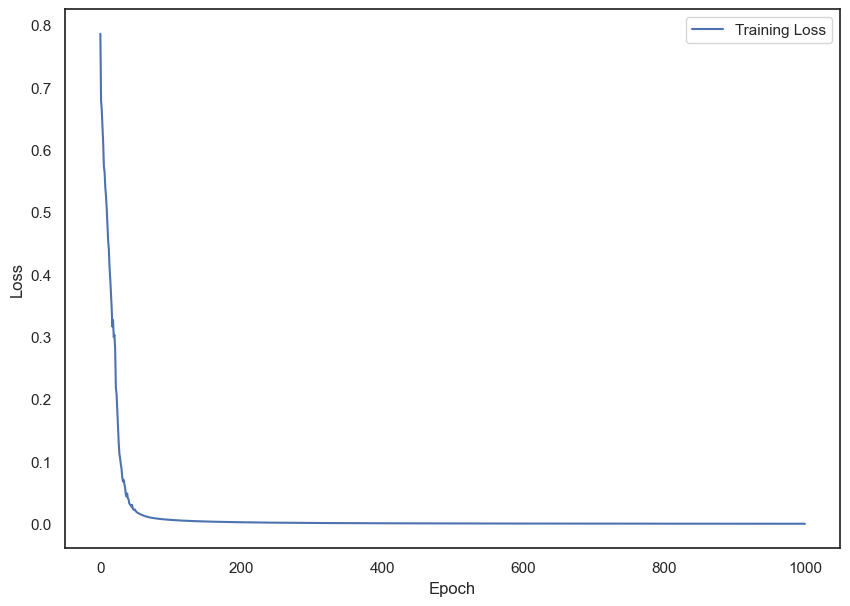

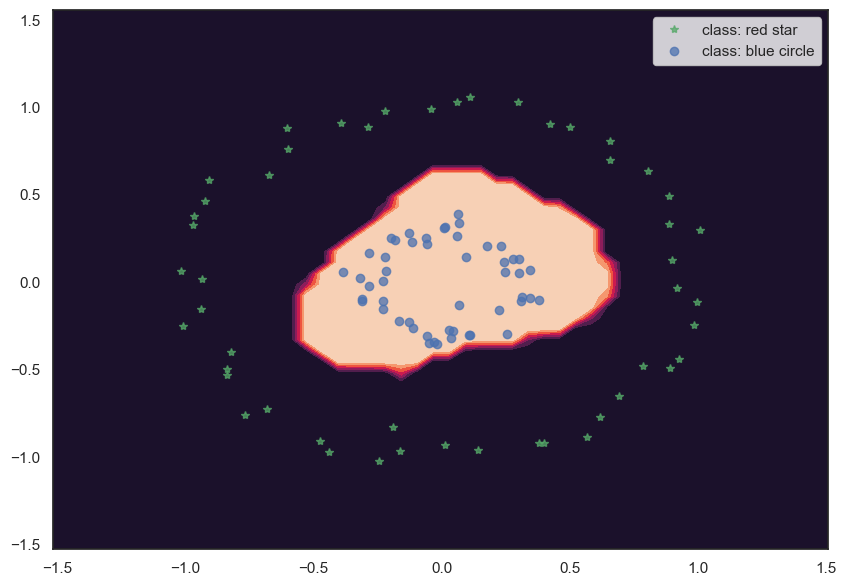

In [69]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets
import numpy as np

# Assuming X, t, x_red, x_blue are defined
X, t = sklearn.datasets.make_circles(n_samples=100, shuffle=False, factor=0.3, noise=0.05)
x_red = X[t == 0]
x_blue = X[t == 1]

# Generate the dataset
T = np.zeros((100, 2))  # Define target matrix
T[t == 1, 1] = 1
T[t == 0, 0] = 1

# Separate the red and blue samples for plotting
x_red = X[t == 0]
x_blue = X[t == 1]

# Convert data to PyTorch tensors
x_data = torch.Tensor(X)
y_data = torch.Tensor(t).unsqueeze(1)

class CustomModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, output_size):
        super(CustomModel, self).__init__()

        # Define learnable parameters without torch.nn.Parameter
        self.weights1 = torch.randn(input_size, hidden_size1, requires_grad=True)
        self.bias1 = torch.zeros(hidden_size1, requires_grad=True)

        self.weights2 = torch.randn(hidden_size1, hidden_size2, requires_grad=True)
        self.bias2 = torch.zeros(hidden_size2, requires_grad=True)

        self.weights3 = torch.randn(hidden_size2, hidden_size3, requires_grad=True)
        self.bias3 = torch.zeros(hidden_size3, requires_grad=True)

        self.weights4 = torch.randn(hidden_size3, hidden_size4, requires_grad=True)
        self.bias4 = torch.zeros(hidden_size4, requires_grad=True)

        self.weights5 = torch.randn(hidden_size4, output_size, requires_grad=True)
        self.bias5 = torch.zeros(output_size, requires_grad=True)

    def forward(self, x):
        x1 = F.tanh(torch.matmul(x, self.weights1) + self.bias1)
        x2 = F.tanh(torch.matmul(x1, self.weights2) + self.bias2)
        x3 = F.tanh(torch.matmul(x2, self.weights3) + self.bias3)
        x4 = F.tanh(torch.matmul(x3, self.weights4) + self.bias4)
        x5 = torch.matmul(x4, self.weights5) + self.bias5
        return F.sigmoid(x5)

    def parameters(self):
        return [self.weights1, self.bias1, self.weights2, self.bias2, 
                self.weights3, self.bias3, self.weights4, self.bias4,
                self.weights5, self.bias5]

    def predict(self, x):
        pred = self.forward(x)
        return torch.where(pred >= 0.5, torch.tensor(1), torch.tensor(0))

# Instantiate the model
custom_model = CustomModel(input_size=2, hidden_size1=5, hidden_size2=5, hidden_size3=5, hidden_size4=5, output_size=1)

# Manually get the parameters from the model
parameters = custom_model.parameters()

# Define the BCE loss and Adam optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(parameters, lr=0.1)

# Training loop
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = custom_model.forward(x_data)
    loss = criterion(y_pred, y_data.float())
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

# Plot the training loss over epochs
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the resulting decision boundary
plot_decision_boundary(X, t)
plt.plot(x_red[:, 0], x_red[:, 1], 'g*', label='class: red star', alpha=0.75)
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='class: blue circle', alpha=0.75)
plt.legend()
plt.show()


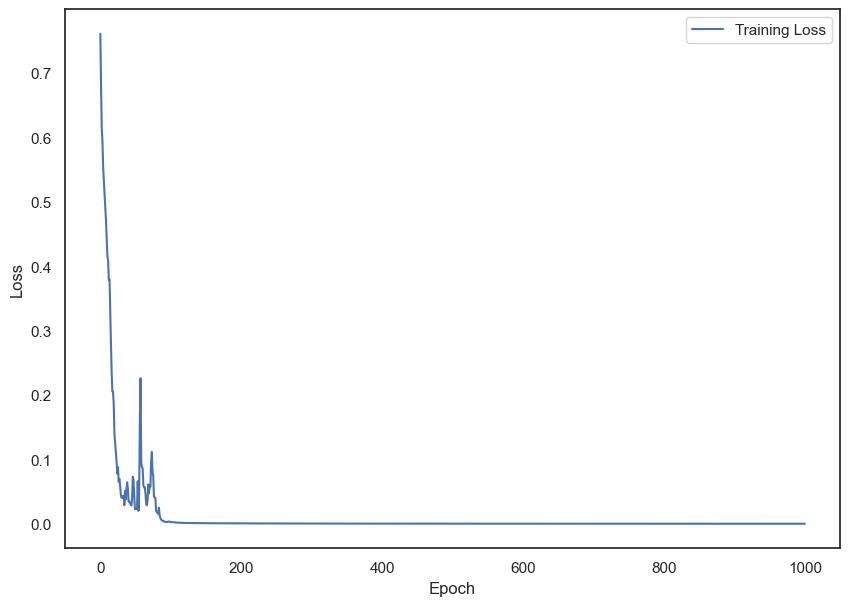

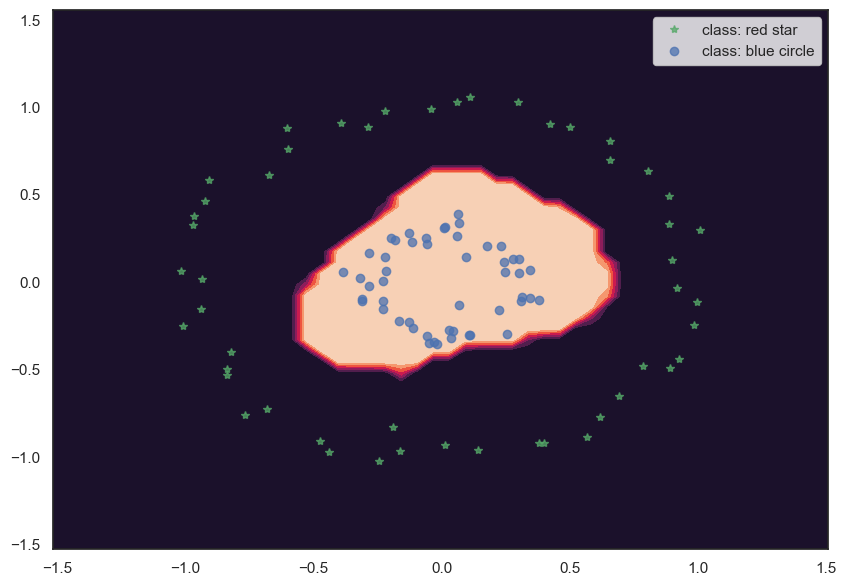

In [72]:
class CustomModel5HiddenLayers(torch.nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, hidden_size5, output_size):
        super(CustomModel5HiddenLayers, self).__init__()

        # Define learnable parameters without torch.nn.Parameter
        self.weights1 = torch.randn(input_size, hidden_size1, requires_grad=True)
        self.bias1 = torch.zeros(hidden_size1, requires_grad=True)

        self.weights2 = torch.randn(hidden_size1, hidden_size2, requires_grad=True)
        self.bias2 = torch.zeros(hidden_size2, requires_grad=True)

        self.weights3 = torch.randn(hidden_size2, hidden_size3, requires_grad=True)
        self.bias3 = torch.zeros(hidden_size3, requires_grad=True)

        self.weights4 = torch.randn(hidden_size3, hidden_size4, requires_grad=True)
        self.bias4 = torch.zeros(hidden_size4, requires_grad=True)

        self.weights5 = torch.randn(hidden_size4, hidden_size5, requires_grad=True)
        self.bias5 = torch.zeros(hidden_size5, requires_grad=True)

        self.weights6 = torch.randn(hidden_size5, output_size, requires_grad=True)
        self.bias6 = torch.zeros(output_size, requires_grad=True)

    def forward(self, x):
        x1 = F.tanh(torch.matmul(x, self.weights1) + self.bias1)
        x2 = F.tanh(torch.matmul(x1, self.weights2) + self.bias2)
        x3 = F.tanh(torch.matmul(x2, self.weights3) + self.bias3)
        x4 = F.tanh(torch.matmul(x3, self.weights4) + self.bias4)
        x5 = F.tanh(torch.matmul(x4, self.weights5) + self.bias5)
        x6 = torch.matmul(x5, self.weights6) + self.bias6
        return F.sigmoid(x6)

    def parameters(self):
        return [self.weights1, self.bias1, self.weights2, self.bias2, 
                self.weights3, self.bias3, self.weights4, self.bias4,
                self.weights5, self.bias5, self.weights6, self.bias6]

    def predict(self, x):
        pred = self.forward(x)
        return torch.where(pred >= 0.5, torch.tensor(1), torch.tensor(0))

# Instantiate the model
custom_model = CustomModel5HiddenLayers(input_size=2, hidden_size1=5, hidden_size2=5, hidden_size3=5, hidden_size4=5, hidden_size5=5, output_size=1)

# Manually get the parameters from the model
parameters = custom_model.parameters()

# Define the BCE loss and Adam optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(parameters, lr=0.1)

# Training loop
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = custom_model.forward(x_data)
    # print("y_pred size:", y_pred.size())
    # print("y_data size:", y_data.size())
    loss = criterion(y_pred, y_data.float())
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

# Plot the training loss over epochs
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the resulting decision boundary
plot_decision_boundary(X, t)
plt.plot(x_red[:, 0], x_red[:, 1], 'g*', label='class: red star', alpha=0.75)
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='class: blue circle', alpha=0.75)
plt.legend()
plt.show()


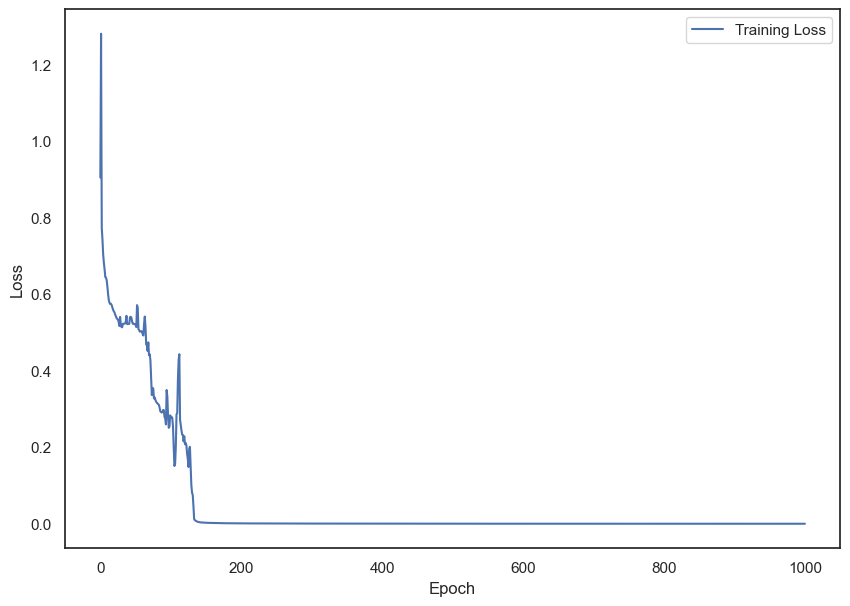

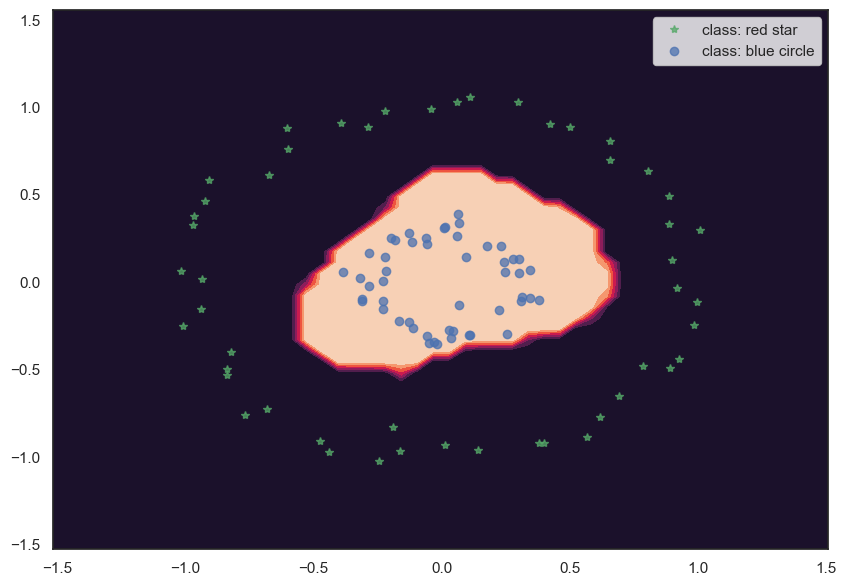

In [73]:
class CustomModel6HiddenLayers(torch.nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, hidden_size5, hidden_size6, output_size):
        super(CustomModel6HiddenLayers, self).__init__()

        # Define learnable parameters without torch.nn.Parameter
        self.weights1 = torch.randn(input_size, hidden_size1, requires_grad=True)
        self.bias1 = torch.zeros(hidden_size1, requires_grad=True)

        self.weights2 = torch.randn(hidden_size1, hidden_size2, requires_grad=True)
        self.bias2 = torch.zeros(hidden_size2, requires_grad=True)

        self.weights3 = torch.randn(hidden_size2, hidden_size3, requires_grad=True)
        self.bias3 = torch.zeros(hidden_size3, requires_grad=True)

        self.weights4 = torch.randn(hidden_size3, hidden_size4, requires_grad=True)
        self.bias4 = torch.zeros(hidden_size4, requires_grad=True)

        self.weights5 = torch.randn(hidden_size4, hidden_size5, requires_grad=True)
        self.bias5 = torch.zeros(hidden_size5, requires_grad=True)

        self.weights6 = torch.randn(hidden_size5, hidden_size6, requires_grad=True)
        self.bias6 = torch.zeros(hidden_size6, requires_grad=True)

        self.weights7 = torch.randn(hidden_size6, output_size, requires_grad=True)
        self.bias7 = torch.zeros(output_size, requires_grad=True)

    def forward(self, x):
        x1 = F.tanh(torch.matmul(x, self.weights1) + self.bias1)
        x2 = F.tanh(torch.matmul(x1, self.weights2) + self.bias2)
        x3 = F.tanh(torch.matmul(x2, self.weights3) + self.bias3)
        x4 = F.tanh(torch.matmul(x3, self.weights4) + self.bias4)
        x5 = F.tanh(torch.matmul(x4, self.weights5) + self.bias5)
        x6 = F.tanh(torch.matmul(x5, self.weights6) + self.bias6)
        x7 = torch.matmul(x6, self.weights7) + self.bias7
        return F.sigmoid(x7)

    def parameters(self):
        return [self.weights1, self.bias1, self.weights2, self.bias2, 
                self.weights3, self.bias3, self.weights4, self.bias4,
                self.weights5, self.bias5, self.weights6, self.bias6,
                self.weights7, self.bias7]

    def predict(self, x):
        pred = self.forward(x)
        return torch.where(pred >= 0.5, torch.tensor(1), torch.tensor(0))
    
    # Instantiate the model
custom_model = CustomModel6HiddenLayers(input_size=2, hidden_size1=5, hidden_size2=5, hidden_size3=5, hidden_size4=5, hidden_size5=5, hidden_size6=5, output_size=1)

# Manually get the parameters from the model
parameters = custom_model.parameters()

# Define the BCE loss and Adam optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(parameters, lr=0.1)

# Training loop
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = custom_model.forward(x_data)
    # print("y_pred size:", y_pred.size())
    # print("y_data size:", y_data.size())
    loss = criterion(y_pred, y_data.float())
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

# Plot the training loss over epochs
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the resulting decision boundary
plot_decision_boundary(X, t)
plt.plot(x_red[:, 0], x_red[:, 1], 'g*', label='class: red star', alpha=0.75)
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='class: blue circle', alpha=0.75)
plt.legend()
plt.show()


with more hidden layers it can achieve the optimal training loss at lower epoches. However with >4 hidden layers the model is too complex and it takes longer to achieve optimal training loss as noise starts to appear in the graph of training loss against no of epoch